# **Retail Sales ETL Project**

## **1. Data Extraction**
Uploaded the CSV file and loaded it into a pandas DataFrame.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [53]:
import pandas as pd

# Get the filename from the uploaded dictionary
filename = next(iter(uploaded))

df = pd.read_csv(filename, encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **2. Data Cleaning**
- Checked for missing values (none found).  
- Converted date columns to datetime format.  
- Created new columns (Shipping Duration, Order Year, Order Month).  
- Removed outliers with extreme discounts and losses.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [55]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [56]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [57]:
# Calculate number of days taken to ship each order
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

In [58]:
# Calculate sales value after applying discount
df['Discounted Sales'] = df['Sales'] * (1 - df['Discount'])

In [59]:
# Extract year and month from order date for trend analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [60]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Duration,Discounted Sales,Order Year,Order Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,261.960000,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,731.940000,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,14.620000,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,526.667625,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,17.894400,2015,10


In [61]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Duration,Discounted Sales,Order Year,Order Month
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,3.958175,197.580421,2015.722233,7.809686
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,0.088800,2014.000000,1.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,3.000000,14.336000,2015.000000,5.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,4.000000,45.923200,2016.000000,9.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,5.000000,180.176475,2017.000000,11.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7.000000,17499.950000,2017.000000,12.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.747567,539.045278,1.123555,3.284654


In [62]:
df['Discount'].value_counts(dropna=False).head(10)

,count
Discount,
0.00,4798
0.20,3657
0.70,418
0.80,300
0.30,227
0.40,206
0.60,138
0.10,94
0.50,66


In [63]:
df[df['Discount'] > 0.5].shape

(856, 25)

In [64]:
df[df['Discount'] > 0.5]['Profit'].describe()

,Profit
count,856.000000
mean,-89.438144
std,363.283239
min,-6599.978000
25%,-35.169600
50%,-11.656700
75%,-4.668000
max,-0.596400


In [65]:
# Remove records with unusually high discounts (over 50%)
df = df[df['Discount'] <= 0.5]

In [66]:
df['Discount'].describe()

,Discount
count,9138.000000
mean,0.103490
std,0.117153
min,0.000000
25%,0.000000
50%,0.000000
75%,0.200000
max,0.500000



## **3. Data Loading**
Stored the cleaned data into an in-memory SQLite database.

In [67]:
import sqlite3

# Create in-memory SQLite DB
conn = sqlite3.connect(':memory:')

# Store DataFrame into SQLite table
df.to_sql('retail_sales', conn, index=False, if_exists='replace')

9138

## **4. Data Analysis & Visualization**
Queried the database to get monthly sales totals and plotted sales trends over time.

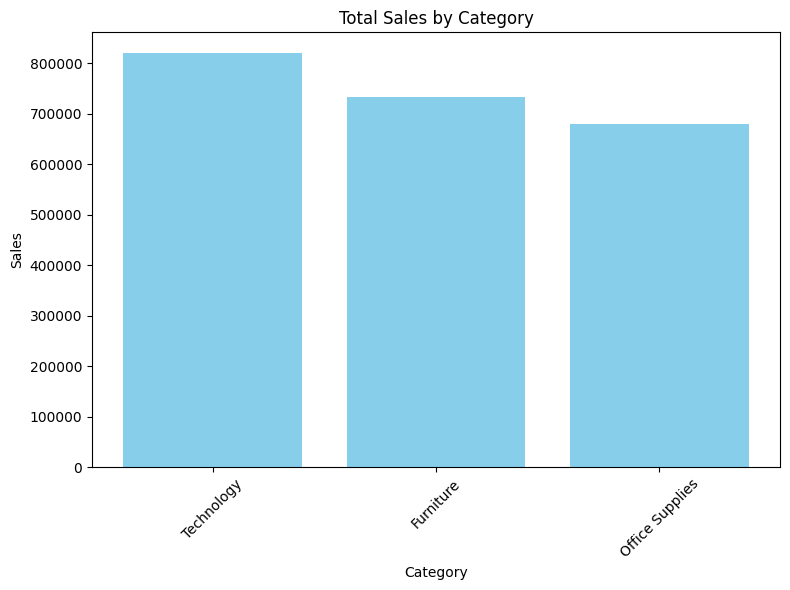

In [68]:
import matplotlib.pyplot as plt

# Visualize total sales for each product category
category_sales = pd.read_sql_query(
    """
    SELECT Category, SUM(Sales) AS TotalSales
    FROM retail_sales
    GROUP BY Category
    ORDER BY TotalSales DESC
    """,
    conn
)

plt.figure(figsize=(8,6))
plt.bar(category_sales['Category'], category_sales['TotalSales'], color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


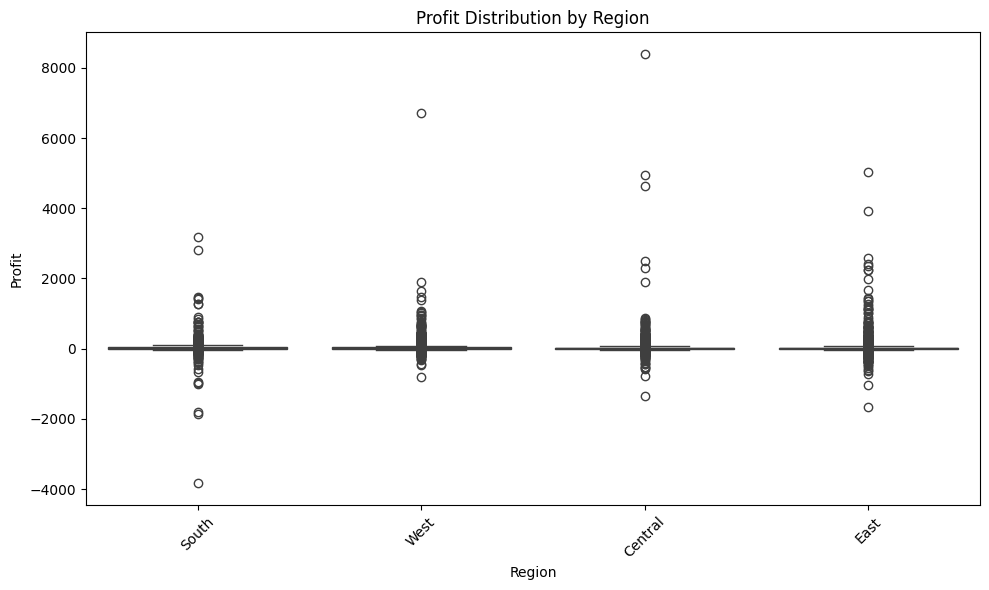

In [69]:
# Visualize profit distribution by region using a box plot
region_profit = pd.read_sql_query(
    """
    SELECT Region, Profit
    FROM retail_sales
    """,
    conn
)

import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Profit', data=region_profit)
plt.title("Profit Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


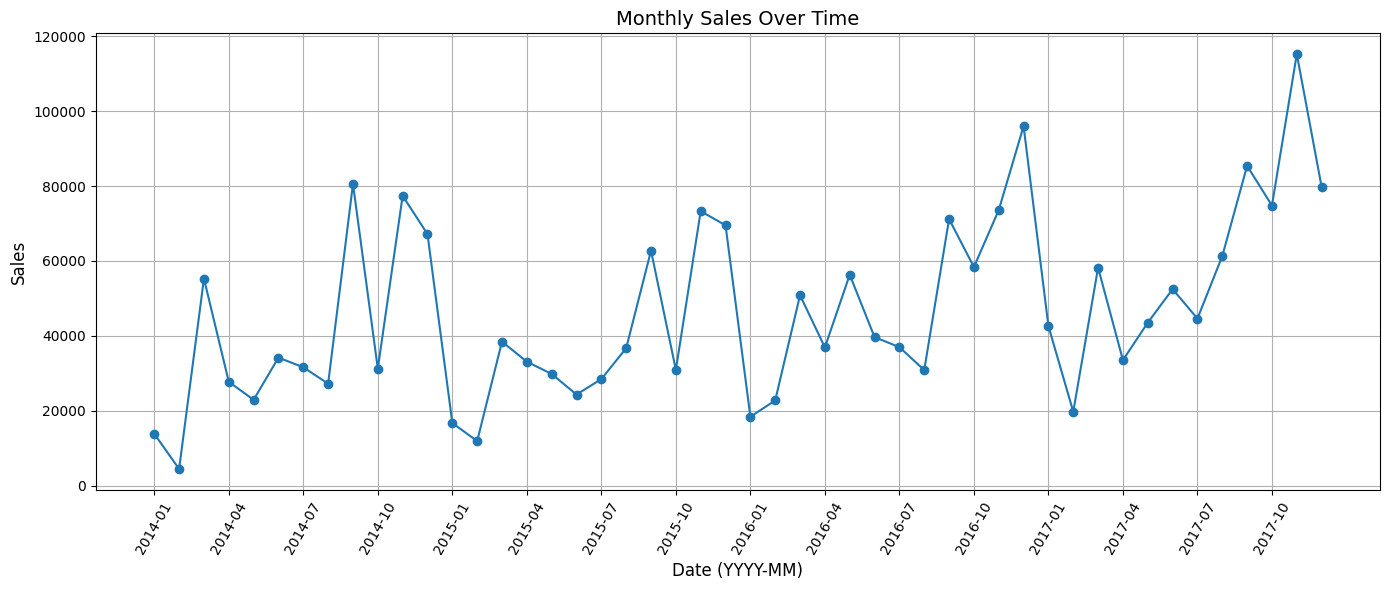

In [70]:
# Plot monthly sales trend over time using formatted date labels
monthly_sales = pd.read_sql_query(
    """
    SELECT "Order Year", "Order Month", SUM(Sales) as MonthlySales
    FROM retail_sales
    GROUP BY "Order Year", "Order Month"
    ORDER BY "Order Year", "Order Month"
    """,
    conn
)

# Format x-axis labels: YYYY-MM
monthly_sales['Date'] = (
    monthly_sales["Order Year"].astype(str) + '-' +
    monthly_sales["Order Month"].astype(str).str.zfill(2)
)

# Plot
plt.figure(figsize=(14, 6))  # Bigger figure
plt.plot(monthly_sales['Date'], monthly_sales['MonthlySales'], marker='o')
plt.xticks(ticks=range(0, len(monthly_sales), 3),  # Show every 3rd label
           labels=monthly_sales['Date'][::3],
           rotation=60, fontsize=10)

plt.title("Monthly Sales Over Time", fontsize=14)
plt.xlabel("Date (YYYY-MM)", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

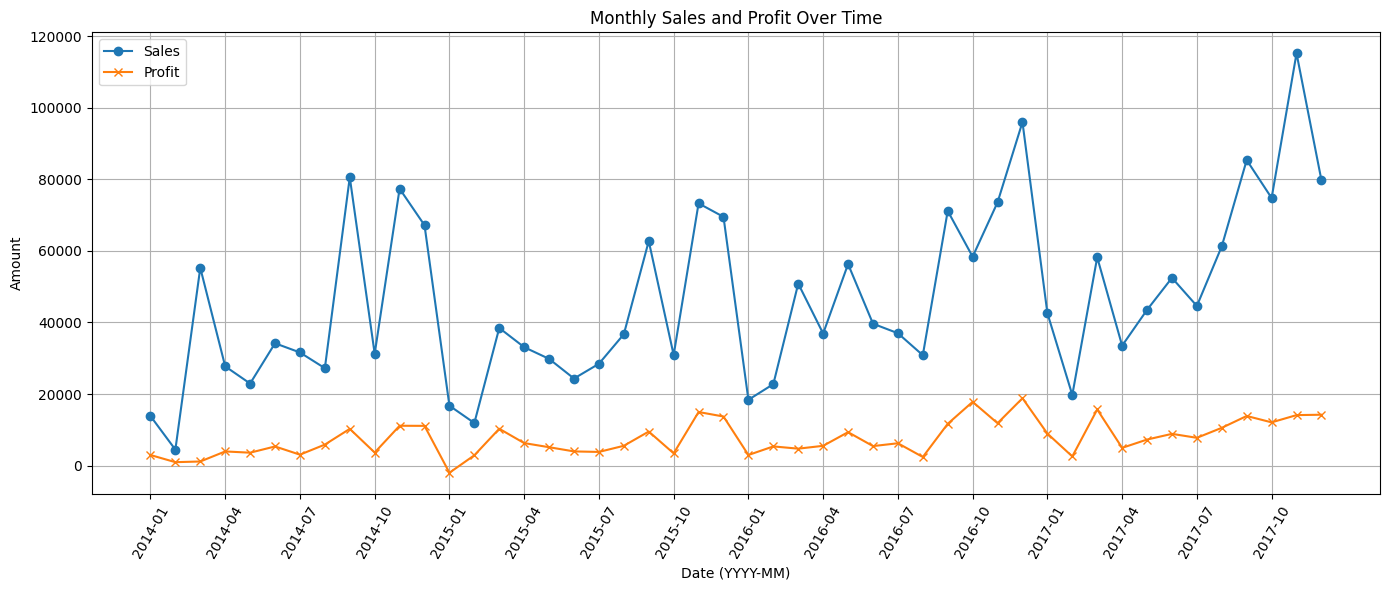

In [71]:
# Plot monthly sales and profit trends on the same graph
monthly_profit = pd.read_sql_query(
    """
    SELECT "Order Year", "Order Month", SUM(Profit) as MonthlyProfit
    FROM retail_sales
    GROUP BY "Order Year", "Order Month"
    ORDER BY "Order Year", "Order Month"
    """,
    conn
)

monthly_sales_profit = monthly_sales.copy()
monthly_sales_profit['MonthlyProfit'] = monthly_profit['MonthlyProfit']

plt.figure(figsize=(14,6))
plt.plot(monthly_sales_profit['Date'], monthly_sales_profit['MonthlySales'], marker='o', label='Sales')
plt.plot(monthly_sales_profit['Date'], monthly_sales_profit['MonthlyProfit'], marker='x', label='Profit')
plt.xticks(ticks=range(0, len(monthly_sales_profit), 3), labels=monthly_sales_profit['Date'][::3], rotation=60)
plt.title("Monthly Sales and Profit Over Time")
plt.xlabel("Date (YYYY-MM)")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()